In [60]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from fbprophet import Prophet
import seaborn as sns

In [61]:
# View the data
data = pd.read_csv('AAPL (1).csv', index_col= 'Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 2016-01-25 to 2019-01-24
Data columns (total 6 columns):
Open         756 non-null float64
High         756 non-null float64
Low          756 non-null float64
Close        756 non-null float64
Adj Close    756 non-null float64
Volume       756 non-null int64
dtypes: float64(5), int64(1)
memory usage: 41.3+ KB


In [62]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-25,101.519997,101.529999,99.209999,99.440002,94.320129,51794500
2016-01-26,99.930000,100.879997,98.070000,99.989998,94.841805,75077000
2016-01-27,96.040001,96.629997,93.339996,93.419998,88.610069,133369700
2016-01-28,93.790001,94.519997,92.389999,94.089996,89.245575,55678800
2016-01-29,94.790001,97.339996,94.349998,97.339996,92.328247,64416500


In [4]:
ts = data['Close']

In [5]:
ts

Date
2016-01-25     99.440002
2016-01-26     99.989998
2016-01-27     93.419998
2016-01-28     94.089996
2016-01-29     97.339996
2016-02-01     96.430000
2016-02-02     94.480003
2016-02-03     96.349998
2016-02-04     96.599998
2016-02-05     94.019997
2016-02-08     95.010002
2016-02-09     94.989998
2016-02-10     94.269997
2016-02-11     93.699997
2016-02-12     93.989998
2016-02-16     96.639999
2016-02-17     98.120003
2016-02-18     96.260002
2016-02-19     96.040001
2016-02-22     96.879997
2016-02-23     94.690002
2016-02-24     96.099998
2016-02-25     96.760002
2016-02-26     96.910004
2016-02-29     96.690002
2016-03-01    100.529999
2016-03-02    100.750000
2016-03-03    101.500000
2016-03-04    103.010002
2016-03-07    101.870003
                 ...    
2018-12-11    168.630005
2018-12-12    169.100006
2018-12-13    170.949997
2018-12-14    165.479996
2018-12-17    163.940002
2018-12-18    166.070007
2018-12-19    160.889999
2018-12-20    156.830002
2018-12-21    150.72

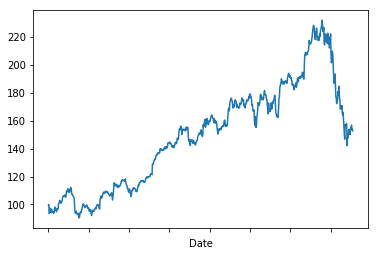

In [41]:
ts.plot()

In [6]:
ts[:5]

Date
2016-01-25    99.440002
2016-01-26    99.989998
2016-01-27    93.419998
2016-01-28    94.089996
2016-01-29    97.339996
Name: Close, dtype: float64

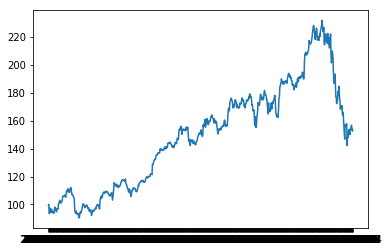

In [7]:
plt.plot(ts)

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
#             #Determing rolling statistics
#         rolmean = pd.rolling_mean(timeseries, window=12)
#         rolstd = pd.rolling_std(timeseries, window=12)

#         #Plot rolling statistics:
#         orig = plt.plot(timeseries, color='blue',label='Original')
#         mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#         std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#         plt.legend(loc='best')
#         plt.title('Rolling Mean & Standard Deviation')
#         plt.show(block=False)

        #Perform Dickey-Fuller test
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

In [9]:
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.485015
p-value                          0.540911
#Lags Used                       8.000000
Number of Observations Used    747.000000
Critical Value (1%)             -3.439134
Critical Value (5%)             -2.865417
Critical Value (10%)            -2.568834
dtype: float64


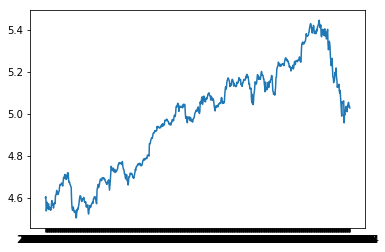

In [10]:
ts_log = np.log(ts)
plt.plot(ts_log)

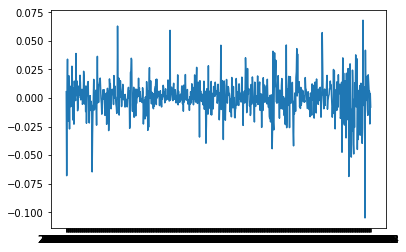

In [11]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [14]:
ts_log_diff.head()
ts_log_diff.dropna(inplace = True)

In [42]:
type(ts_log_diff)

pandas.core.series.Series

In [15]:
test_stationarity(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                 -26.481449
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    754.000000
Critical Value (1%)             -3.439053
Critical Value (5%)             -2.865381
Critical Value (10%)            -2.568815
dtype: float64


In [16]:
from statsmodels.tsa.stattools import acf, pacf

In [17]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

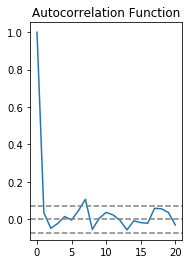

In [18]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

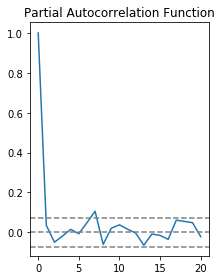

In [19]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [20]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Alekhya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Alekhya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1739')

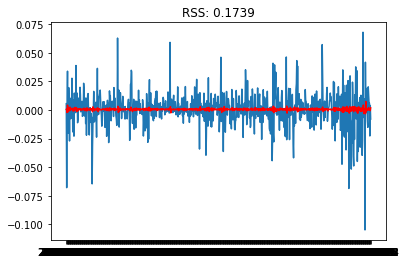

In [21]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\Alekhya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Alekhya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1740')

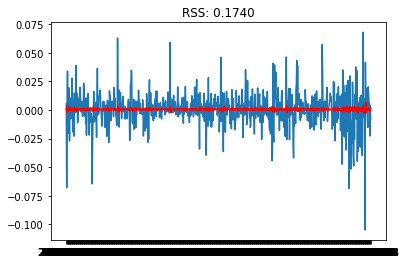

In [22]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\Alekhya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Alekhya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1739')

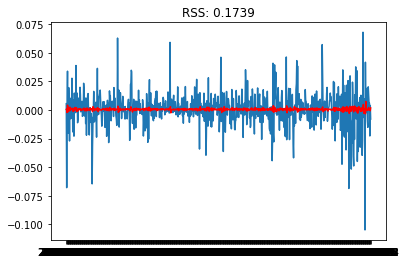

In [25]:
model = ARIMA(ts_log, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [49]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2016-01-26    0.000574
2016-01-27    0.000746
2016-01-28   -0.002193
2016-01-29    0.004281
2016-02-01    0.002136
dtype: float64

In [50]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2016-01-26    0.000574
2016-01-27    0.001320
2016-01-28   -0.000873
2016-01-29    0.003408
2016-02-01    0.005543
dtype: float64

In [51]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2016-01-25    4.599554
2016-01-26    4.600128
2016-01-27    4.600874
2016-01-28    4.598681
2016-01-29    4.602962
dtype: float64

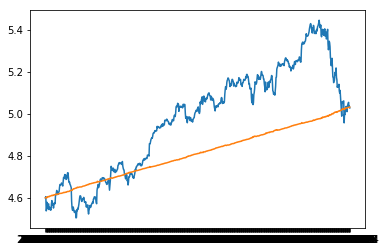

In [52]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

In [46]:
ts.shape


(756,)

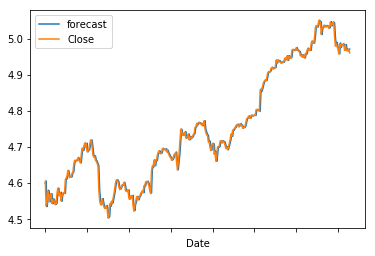

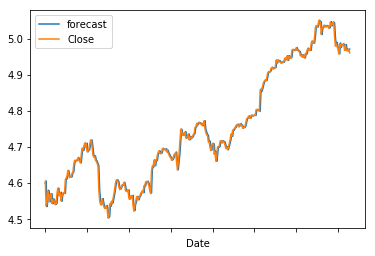

In [59]:

results_ARIMA.plot_predict(1, 365)
# results_ARIMA.forecast(steps = 365)
